In [1]:
setwd('/import/liujing/data/my')

In [2]:
load('../expr2.test.rda')

In [3]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
colnames(data1) = gsub('-','.',colnames(data1))

In [5]:
expr2 = data1

In [6]:
head(expr2,2)

,RNA5SP111,RNA5SP110,RNA5SP113,RNA5SP115,ADAMTS6,LDHAP3,ZFP91,ZFP90,ZFP92,CLDND1,...,CCT6P2,CCT6P1,ZNF625,RP11.292I17.1,RPL41,THY1,IL31RA,SPCS2P3,RP11.342F17.2,RFXANK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10,0,0,0,0.0000000,0.3562586,0,10.26186,3.844663,0.6462348,9.324558,...,0,2.146576,0.0000000,0,1.946472,0.00000000,0.2831231,0,0,11.53282
CI11,0,0,0,0.5959994,0.2828684,0,10.88521,9.772605,0.4071632,17.443463,...,0,3.128997,0.1091985,0,4.102974,0.01076683,0.2463916,0,0,15.68492


In [7]:
library(caret)#做交叉验证用
library(pROC)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [8]:
expr2 = expr2 %>%  dplyr::select(c('HIST1H3F','ITGA2B','IL23R','PTCRA','CRIP1','MT.ND6','MYRF'))

In [9]:
Type = data.frame(Group = Type)

In [10]:
data = cbind(Type,expr2)

In [33]:
set.seed(1)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=100)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~HIST1H3F+ITGA2B+IL23R+PTCRA+CRIP1+MT.ND6+MYRF,data=train,family=binomial())
  model_pre<-predict(model,type='response', newdata=test)
  auc_value<- append(auc_value,
                     as.numeric(auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



[1] 0.6716667

In [45]:
fit.reduce<-glm(Group~HIST1H3F+ITGA2B+IL23R+PTCRA+CRIP1+MT.ND6+MYRF,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ HIST1H3F + ITGA2B + IL23R + PTCRA + CRIP1 + 
    MT.ND6 + MYRF, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7042  -0.6934  -0.1070   0.9055   1.6000  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.77492    2.34377   0.757    0.449
HIST1H3F     0.05566    0.05944   0.936    0.349
ITGA2B       0.26682    0.29398   0.908    0.364
IL23R       -1.58280    1.61124  -0.982    0.326
PTCRA       -0.29653    0.25178  -1.178    0.239
CRIP1       -1.30412    0.99761  -1.307    0.191
MT.ND6       0.01198    0.01163   1.030    0.303
MYRF        -2.88075    4.11112  -0.701    0.483

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.016  on 33  degrees of freedom
Residual deviance: 32.042  on 26  degrees of freedom
AIC: 48.042

Number of Fisher Scoring iterations: 7


In [46]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ HIST1H3F + ITGA2B + IL23R + PTCRA + CRIP1 + 
    MT.ND6 + MYRF, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7042  -0.6934  -0.1070   0.9055   1.6000  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.77492    2.34377   0.757    0.449
HIST1H3F     0.05566    0.05944   0.936    0.349
ITGA2B       0.26682    0.29398   0.908    0.364
IL23R       -1.58280    1.61124  -0.982    0.326
PTCRA       -0.29653    0.25178  -1.178    0.239
CRIP1       -1.30412    0.99761  -1.307    0.191
MT.ND6       0.01198    0.01163   1.030    0.303
MYRF        -2.88075    4.11112  -0.701    0.483

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.016  on 33  degrees of freedom
Residual deviance: 32.042  on 26  degrees of freedom
AIC: 48.042

Number of Fisher Scoring iterations: 7


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [47]:
options(repr.plot.width = 6)

In [48]:
library(ggplot2)

Area under the curve: 0.8264

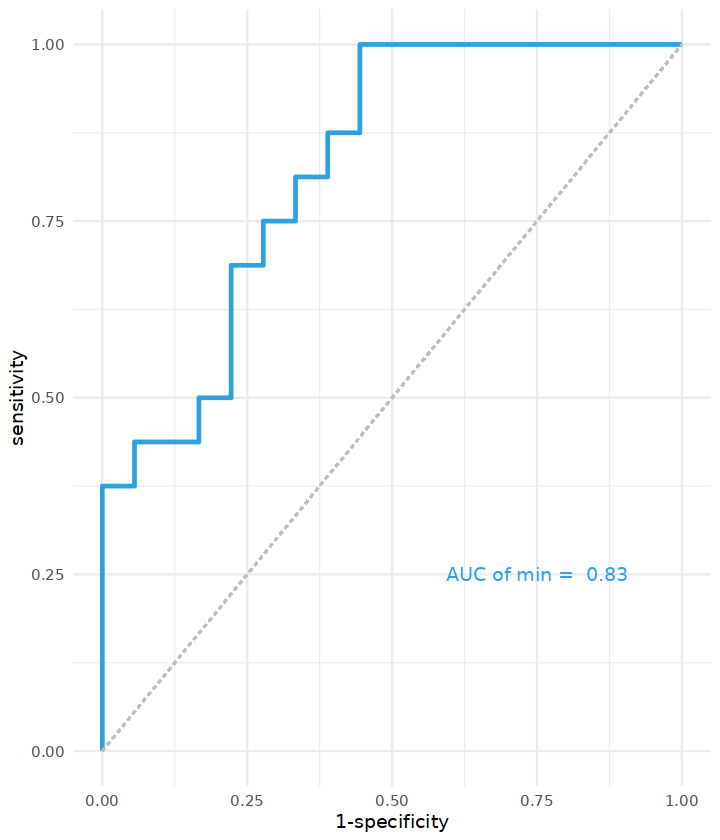

In [49]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [51]:
library(ROCR)
library(rms)

In [52]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [53]:
data$Group = as.factor(data$Group)

In [54]:
fit1 <- lrm(Group~HIST1H3F+ITGA2B+IL23R+PTCRA+CRIP1+MT.ND6+MYRF , data=data,x=T,y=T)


In [55]:
fit1

Logistic Regression Model

lrm(formula = Group ~ HIST1H3F + ITGA2B + IL23R + PTCRA + CRIP1 + 
    MT.ND6 + MYRF, data = data, x = T, y = T)

                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            34    LR chi2     14.97     R2       0.476    C       0.826    
 0             18    d.f.            7     R2(7,34) 0.209    Dxy     0.653    
 1             16    Pr(> chi2) 0.0363    R2(7,25.4)0.269    gamma   0.653    
max |deriv| 7e-07                          Brier    0.165    tau-a   0.335    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  1.7749 2.3438  0.76  0.4489  
HIST1H3F   0.0557 0.0594  0.94  0.3491  
ITGA2B     0.2668 0.2940  0.91  0.3641  
IL23R     -1.5828 1.6113 -0.98  0.3259  
PTCRA     -0.2965 0.2518 -1.18  0.2389  
CRIP1     -1.3041 0.9976 -1.31  0.1911  
MT.ND6     0.0120 0.0116  1.03  0.3032  
MYRF      -2.8807 4.1111 -0.70  0.4835  


In [56]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [57]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [58]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [59]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [60]:
save(fit1,data,file = 'test.fit1.rda')

In [61]:
#列线图代码只能在Rstudio话

In [62]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [63]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


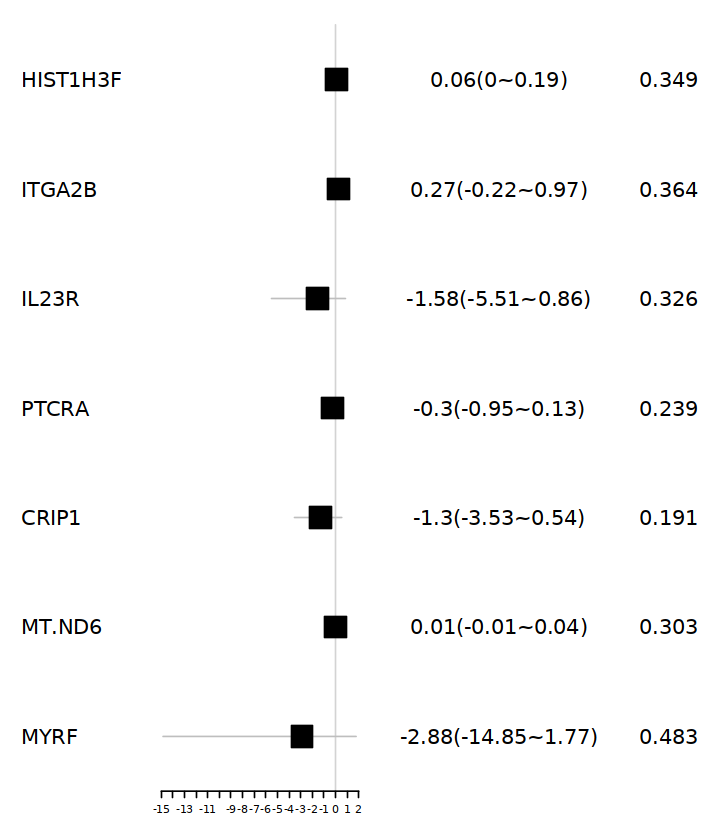

In [64]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           graph.pos=2)

In [139]:
# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            lineheight = unit(7,'mm'),
#            colgap=unit(2,'mm'),
#            lwd.zero=1.5,
#            lwd.ci=2, 
#            col=fpColors(box='#458B00',
#                         summary='#8B008B',
#                         lines = 'black',
#                         zero = '#7AC5CD'),
#            xlab="OR",
#            lwd.xaxis =1,
#            txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
#                             xlab  = gpar(cex = 0.8),
#                             cex = 0.9),
#            lty.ci = "solid",
#            title = "Forestplot", 
#            line.margin = 0.08,
#            graph.pos=2)


In [140]:
#nmfinput= data[MDD,c('MYRF','IGHJ3P','RBMS1P1','CTD.2114J12.1')] %>%  t() %>%  as.data.frame()

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': object 'MDD' not found


In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


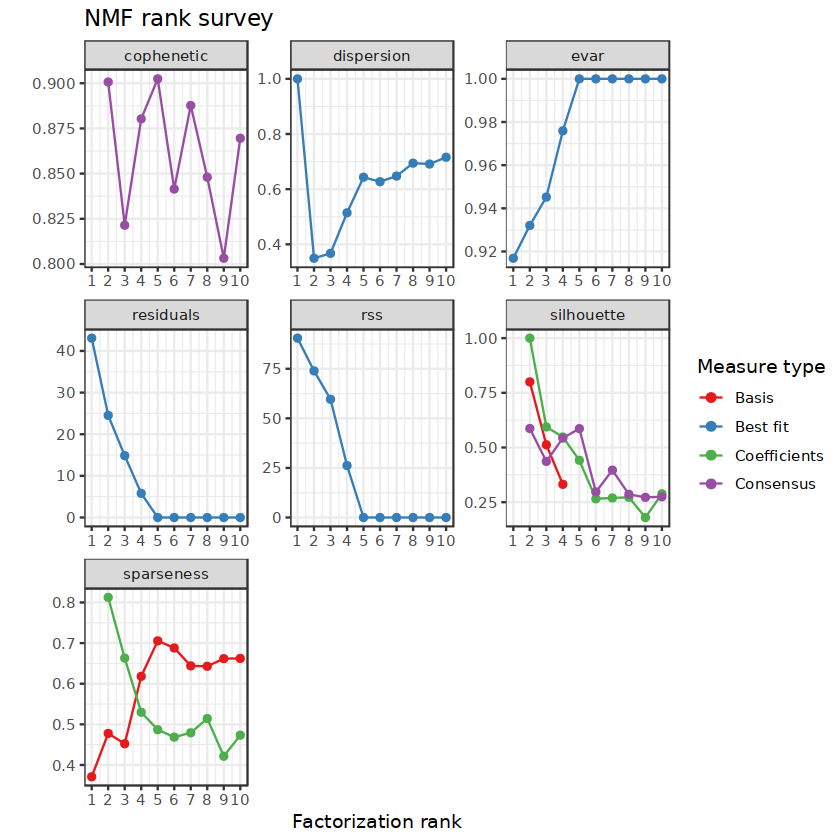

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

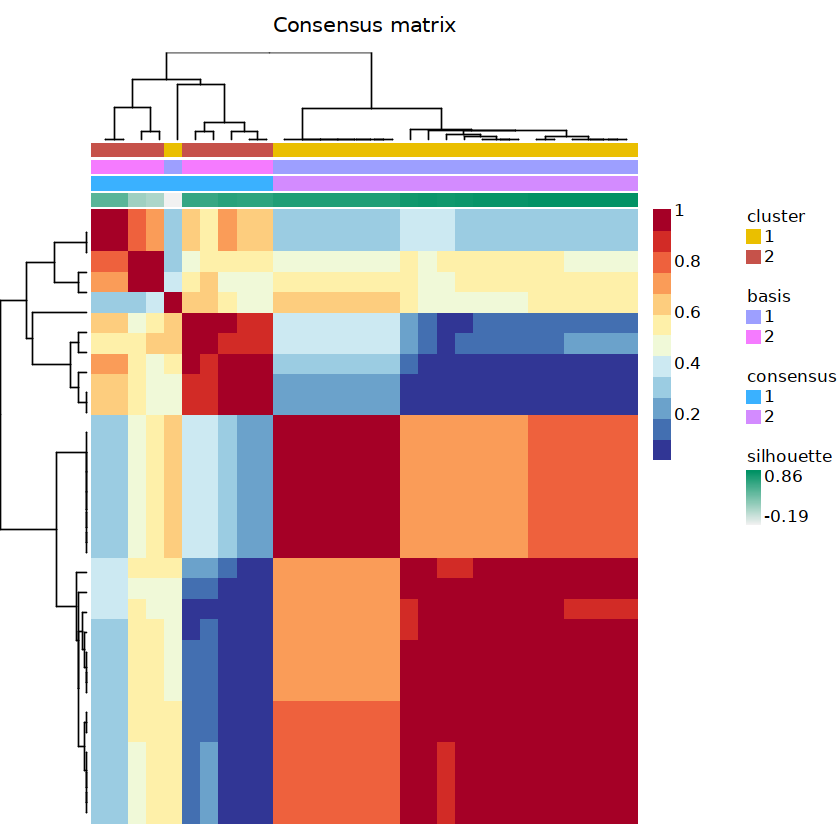

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

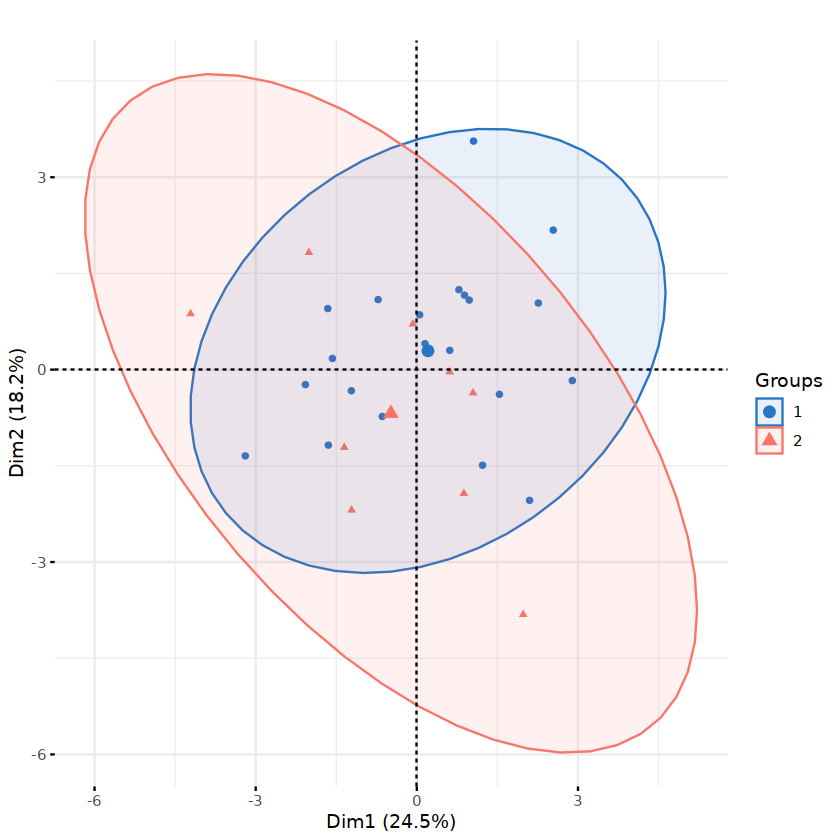

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

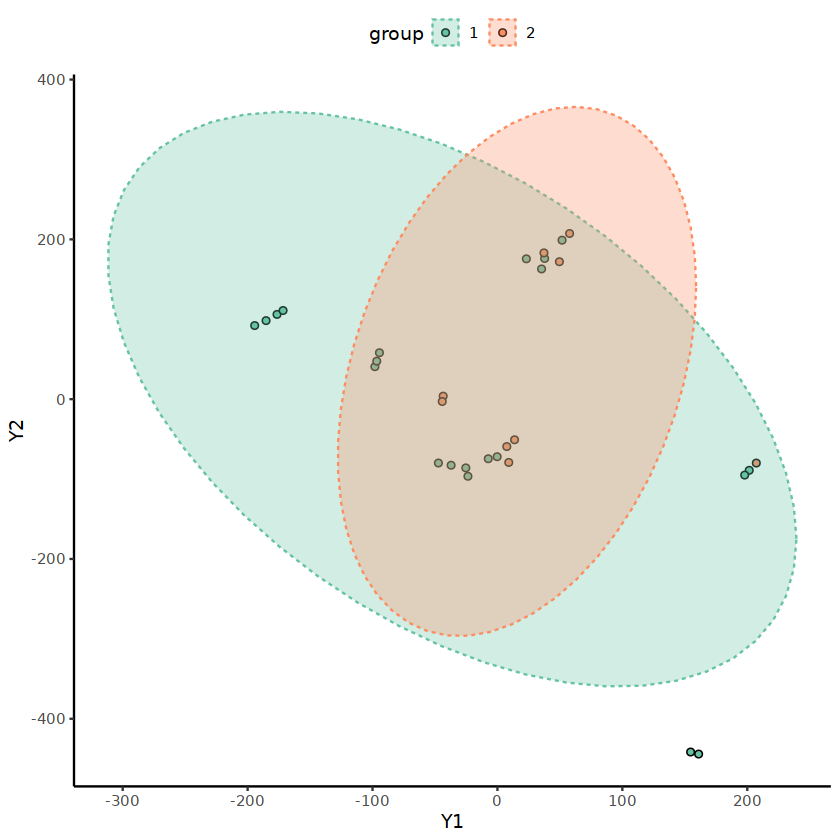

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")